In [1]:
import pandas as pd
import numpy as np
import os
from os.path import join, pardir
DATA_DIR = join(pardir, pardir, 'data', 'write_new_algorithm')
DATA_DIR_ZK = join(pardir, pardir, 'data', 'write_zookeeper')

dfs = []
dfs2 = []
for mem in [512, 1024, 2048]:
    
    for size in [4, 1024, 65536, 131072, 256000]:
        df = pd.read_csv(join(DATA_DIR, f'persistent_{size}_{mem}_processed.csv'), index_col=0)
        df['size'] = size / 1024
        
        #print(df)
        # data is broken :-(
        #df = df.loc[df['memory'] == mem]
        #df = df.groupby(['memory', 'function']).head(150).reset_index(drop=True)
        #if df.shape[0] > 200:
        #    print(size, mem)
        dfs.append(df)
        
        
        zk = pd.read_csv(join(DATA_DIR, f'persistent_{size}_{mem}_processed.csv'), index_col=0)
        
        
        df = pd.read_csv(join(DATA_DIR, f'persistent_{size}_{mem}.csv'), index_col=0)
        #df = df.groupby(['memory', 'size']).head(100).reset_index(drop=True)
        df['size'] = size / 1024
        df['data'] /= 1000.0
        #df.loc[df['op'] == 'set_data', 'data'] /= 1000
        dfs2.append(df)

for size in [4, 1024, 65536, 131072, 256000]:
        df = pd.read_csv(join(DATA_DIR_ZK, f'interregion_{size}.csv'), index_col=0)
    df['data'] /= 1000.0
    df['size'] /= 1024.0
    df['memory'] = 'ZooKeeper'
    dfs2.append(df)

        
dynamo_df = pd.concat(dfs)
dynamo_df['system'] = 'persistent'
dynamo_df_client = pd.concat(dfs2)
dynamo_df_client['system'] = 'persistent'
print(dynamo_df_client.loc[dynamo_df_client['memory'] == 'ZooKeeper'])
print(dynamo_df)



       data  client_write_data        op     memory        size      system
0     4.074                NaN  set_data  ZooKeeper    0.003906  persistent
1     4.041                NaN  set_data  ZooKeeper    0.003906  persistent
2     3.772                NaN  set_data  ZooKeeper    0.003906  persistent
3     3.598                NaN  set_data  ZooKeeper    0.003906  persistent
4     3.351                NaN  set_data  ZooKeeper    0.003906  persistent
..      ...                ...       ...        ...         ...         ...
145  34.913                NaN  set_data  ZooKeeper  250.000000  persistent
146   9.084                NaN  set_data  ZooKeeper  250.000000  persistent
147  34.226                NaN  set_data  ZooKeeper  250.000000  persistent
148   9.794                NaN  set_data  ZooKeeper  250.000000  persistent
149  57.683                NaN  set_data  ZooKeeper  250.000000  persistent

[750 rows x 6 columns]
                                   request     time  billed_time

In [4]:

DATA_DIR = join(pardir, pardir, 'data', 'write_new')
dfs = []

# lock atomic commit push rest
barplot_data = [[],[],[],[],[]]
#barplot_stds = [[],[],[],[],[],[]]
#for size in [4, 1024, 65536, 131072, 256000]:
size = 4
memory = 512
df = pd.read_csv(join(DATA_DIR, f'persistent_{size}_summary.csv'),index_col=None)
df['size'] = size / 1024.0
df['value'] *= 1000.0
df['value'] /= df['repetitions']
print(df.loc[(df['memory'] == memory) & (df['function'] == 'writer')])

barplot_data[0].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'lock')]['value'].values[0])
barplot_data[1].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'atomic')]['value'].values[0])
barplot_data[2].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'commit')]['value'].values[0])
barplot_data[3].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'push')]['value'].values[0])
total = df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'total')]['value'].values[0]
barplot_data[4].append(
    total
    - barplot_data[0][-1] - barplot_data[1][-1] - barplot_data[2][-1] - barplot_data[3][-1]
)
#for i in range(5):
#    barplot_data[i][-1] /= total

memory = 2048
barplot_data[0].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'lock')]['value'].values[0])
barplot_data[1].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'atomic')]['value'].values[0])
barplot_data[2].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'commit')]['value'].values[0])
barplot_data[3].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'push')]['value'].values[0])
total = df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'total')]['value'].values[0]
barplot_data[4].append(
    total
    - barplot_data[0][-1] - barplot_data[1][-1] - barplot_data[2][-1] - barplot_data[3][-1]
)
#for i in range(5):
#    barplot_data[i][-1] /= total


size = 65536
memory = 512
df = pd.read_csv(join(DATA_DIR, f'persistent_{size}_summary.csv'),index_col=None)
df['size'] = size / 1024.0
df['value'] *= 1000.0
df['value'] /= df['repetitions']
barplot_data[0].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'lock')]['value'].values[0])
barplot_data[1].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'atomic')]['value'].values[0])
barplot_data[2].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'commit')]['value'].values[0])
barplot_data[3].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'push')]['value'].values[0])
total = df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'total')]['value'].values[0]
barplot_data[4].append(
    total
    - barplot_data[0][-1] - barplot_data[1][-1] - barplot_data[2][-1] - barplot_data[3][-1]
)
#for i in range(5):
#    barplot_data[i][-1] /= total



memory = 2048
barplot_data[0].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'lock')]['value'].values[0])
barplot_data[1].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'atomic')]['value'].values[0])
barplot_data[2].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'commit')]['value'].values[0])
barplot_data[3].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'push')]['value'].values[0])
total = df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'total')]['value'].values[0]
barplot_data[4].append(
    total
    - barplot_data[0][-1] - barplot_data[1][-1] - barplot_data[2][-1] - barplot_data[3][-1]
)
#for i in range(5):
#    barplot_data[i][-1] /= total

size = 256000
memory = 512
df = pd.read_csv(join(DATA_DIR, f'persistent_{size}_summary.csv'),index_col=None)
df['size'] = size / 1024.0
df['value'] *= 1000.0
df['value'] /= df['repetitions']
barplot_data[0].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'lock')]['value'].values[0])
barplot_data[1].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'atomic')]['value'].values[0])
barplot_data[2].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'commit')]['value'].values[0])
barplot_data[3].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'push')]['value'].values[0])
total = df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'total')]['value'].values[0]
barplot_data[4].append(
    total
    - barplot_data[0][-1] - barplot_data[1][-1] - barplot_data[2][-1] - barplot_data[3][-1]
)
#for i in range(5):
#    barplot_data[i][-1] /= total



memory = 2048
barplot_data[0].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'lock')]['value'].values[0])
barplot_data[1].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'atomic')]['value'].values[0])
barplot_data[2].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'commit')]['value'].values[0])
barplot_data[3].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'push')]['value'].values[0])
total = df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'total')]['value'].values[0]
barplot_data[4].append(
    total
    - barplot_data[0][-1] - barplot_data[1][-1] - barplot_data[2][-1] - barplot_data[3][-1]
)
#for i in range(5):
#    barplot_data[i][-1] /= total

print(barplot_data)

      type      value  memory function  repetitions      size
10   total  34.285431     512   writer          200  0.003906
11    lock   6.875050     512   writer          200  0.003906
12  atomic   6.365731     512   writer          200  0.003906
13  commit   6.215975     512   writer          200  0.003906
14    push  14.806868     512   writer          200  0.003906
[[6.875050067901612, 8.789880275726318, 8.336803913116455, 8.813973665237427, 12.075574398040771, 10.738768577575684], [6.3657307624816895, 8.764091730117798, 7.974588871002198, 7.887829542160034, 10.970770120620726, 10.867022275924683], [6.215975284576416, 8.515704870223999, 7.598031759262085, 8.014299869537354, 8.755810260772705, 9.13293719291687], [14.806867837905884, 16.734914779663086, 54.07837271690368, 32.95866847038269, 189.4632947444916, 115.13480186462402], [0.021806955337524414, 0.023578405380249023, 0.024029016494772293, 0.027037858963012695, 0.026711225509615133, 0.034395456314086914]]


In [3]:
# cost compute
# DynamoDB
dynamodb_r_cost = 0.25 / 10**6
dynamodb_w_cost = 1.25 / 10**6

dynamodb_stream = 0.02 / 100000

request_cost = 0.20 / 10**6
# per mb-second
duration_cost = 0.0000166667
# dynamodb cost
import numpy as np
requests = 1000

dynamo_df['compute_cost'] = dynamo_df['billed_time'] * dynamo_df['memory'] * (duration_cost / 1000) / 1024.0
dynamo_df['compute_cost_dollar'] = dynamo_df['compute_cost']  * requests

# push to queue + 2 locks + 1 counter + 1 system storage
writer_function = dynamo_df.loc[dynamo_df['function'] == 'writer']
dynamo_df.loc[dynamo_df['function'] == 'writer', 'database_cost'] = 3 + 1 + np.ceil(writer_function['size'])
dynamo_df.loc[dynamo_df['function'] == 'writer', 'database_cost_dollar'] = (3 + 1 + np.ceil(writer_function['size']))*dynamodb_w_cost*requests

# 1 write to storage
distributor_function = dynamo_df.loc[dynamo_df['function'] == 'distributor']
dynamo_df.loc[dynamo_df['function'] == 'distributor', 'database_cost'] = np.ceil(distributor_function['size'])
dynamo_df.loc[dynamo_df['function'] == 'distributor', 'database_cost_dollar'] = np.ceil(distributor_function['size'])*dynamodb_w_cost*requests

#df['database_cost'] = df['cost'] * dynamodb_r_cost
# convert to cents
# 1k requests
dynamo_df['requests_costs'] = request_cost * requests
dynamo_df['stream_cost'] = dynamodb_stream * 2 * requests + np.ceil(dynamo_df['size'])*dynamodb_w_cost*requests
dynamo_df['total_cost'] = dynamo_df['compute_cost_dollar'] + dynamo_df['database_cost_dollar']
dynamo_df['other_cost'] =  dynamo_df['stream_cost'] + dynamo_df['requests_costs']

print(dynamo_df)

#df['total_cost'] *= 100

costs = []
for mem in [128, 256, 512, 1024, 2048]:
    
    for size in [4, 1024, 65536, 131072, 408576]:
        size /=1024.0
        #df = pd.read_csv(join(DATA_DIR, f'dynamo_{size}_{mem}_processed.csv'), index_col=0)
        #df = df.loc[df['memory'] == mem]
        #print(mem, size, df.shape[0])
        #df = df.groupby(['memory', 'function']).head(100).reset_index(drop=True)
        x = dynamo_df.loc[(dynamo_df['memory'] == mem) & (dynamo_df['size'] == size)]
        x1 = x.groupby(['function'])
        print([size, mem, x1['total_cost'].mean()['distributor'], x1['total_cost'].mean()['writer'],  request_cost * requests +  dynamodb_stream * 2 * requests])
        
        costs.append([size, mem, x1['total_cost'].mean()['distributor'] + x1['total_cost'].mean()['writer'] +  request_cost * requests +  x1['stream_cost'].mean()['writer']])
        #costs.append([size, mem, ])
        #print(x)
df_costs = pd.DataFrame(data=costs, columns=['size', 'memory', 'cost'])
print(df_costs)


                                   request    time  billed_time  memory  \
0     08cf2b90-7489-5640-812b-71eac2090e84   49.04           50     512   
1     370c0db4-0807-564d-aa71-57cebe8715a2   51.00           52     512   
2     8583cbab-f07e-5e3b-8e55-91d1460108dc   47.11           48     512   
3     0b608b0d-ace3-5a8d-92e3-d1771a9c0c6e   33.27           34     512   
4     75316125-0a51-56a6-beed-3b5fbc2ebf1f   35.81           36     512   
...                                    ...     ...          ...     ...   
1048  c1000c8c-ba60-5ff7-bae6-56f674b65b63  144.12          145    2048   
1049  f60f3dca-dc0a-5cb2-9427-67b012dc770a  101.18          102    2048   
1050  6043f8ba-23c2-512c-986a-a2c0ed172885  147.41          148    2048   
1051  eda8ea0b-9502-5e8b-a927-b0715bd696ad  155.47          156    2048   
1052  c78e2845-9174-5b4d-b850-723f5fa0f00d  161.62          162    2048   

      used_memory                                  read  write     function  \
0              76  0

KeyError: 'distributor'

/tmp/ipykernel_3384744/2364432367.py:80: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


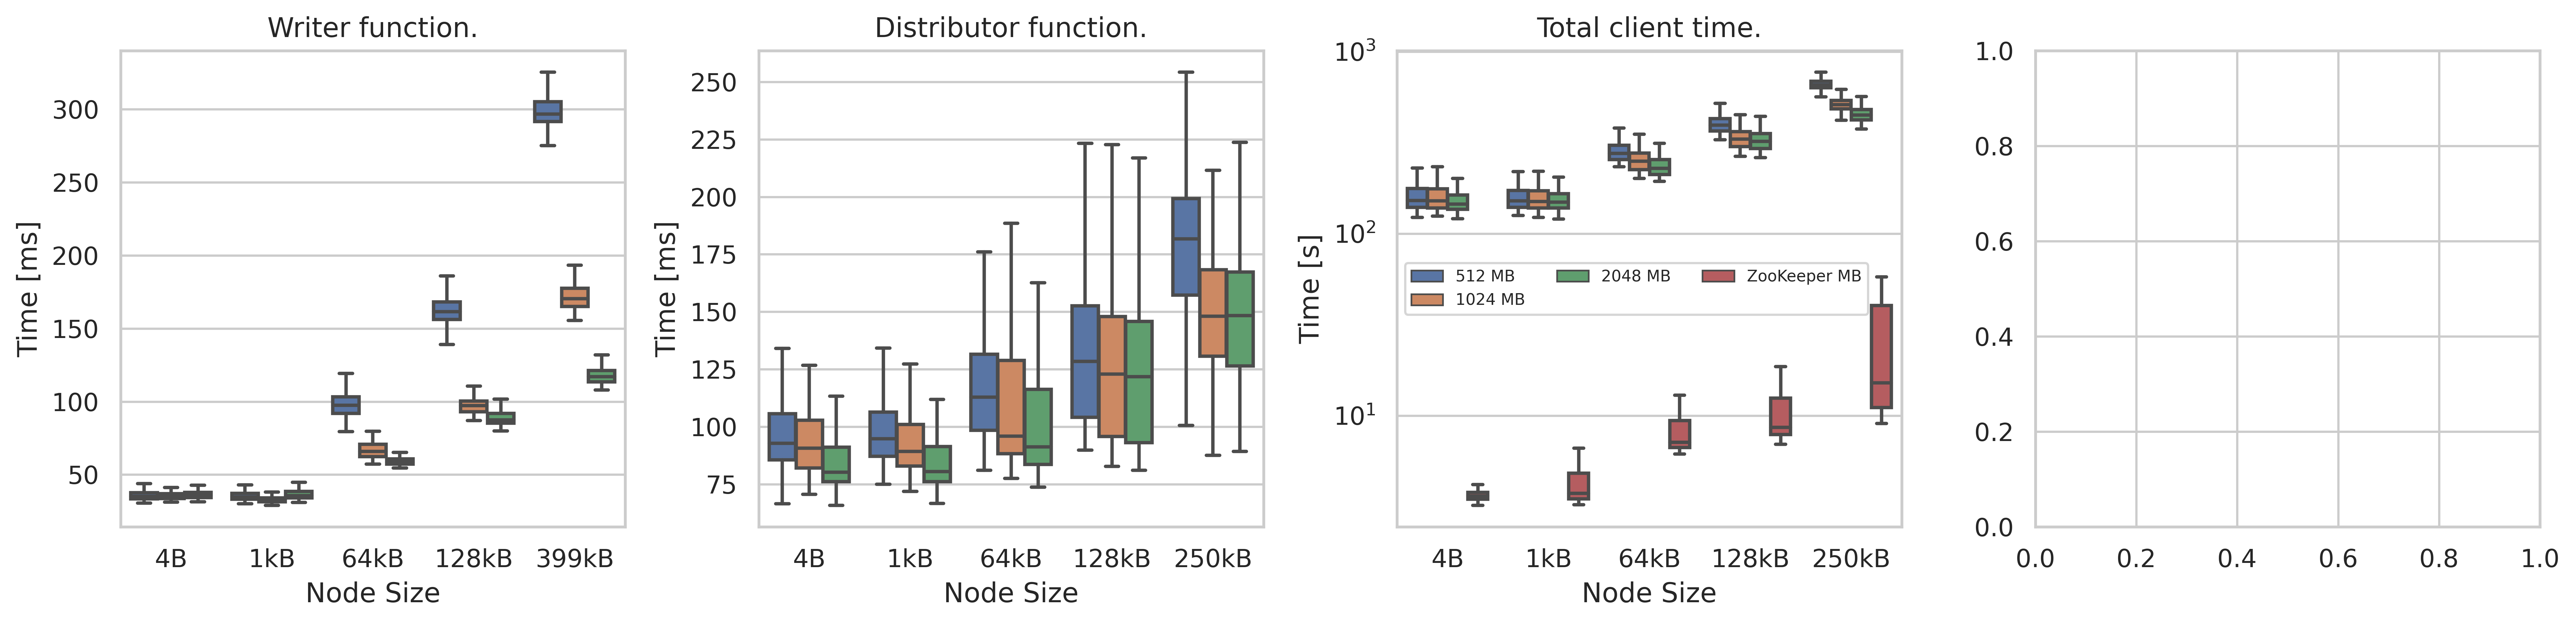

In [40]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats
from os.path import join, pardir

DATA_DIR = join(pardir, pardir, 'data', 'read')

#sns.set(rc={'figure.figsize':(16,8)})
sns.set(rc={'figure.figsize':(16,4)})
sns.set_style("whitegrid")

fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(1,8)
writer = fig3.add_subplot(gs[0, 0:2])
distr1 = fig3.add_subplot(gs[0, 2:4])
total = fig3.add_subplot(gs[0, 4:6])
barplot = fig3.add_subplot(gs[0,6:8])

penguins = sns.load_dataset("penguins")

tips = sns.load_dataset("tips")
# Draw a nested barplot by species and sex
g = sns.boxplot(x="size", y="time",
            hue="memory", #palette=["m", "g"],
            data=dynamo_df.loc[dynamo_df['function']=='writer'], ax=writer,showfliers=False)

handles, labels = g.get_legend_handles_labels()
g.legend().set_visible(False)
#(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=2) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '399kB') )
g.set_xlabel('Node Size',fontsize=12)
g.set_ylabel('Time [ms]',fontsize=12)
g.set_title('Writer function.', fontsize=12)

# Draw a nested barplot by species and sex
g = sns.boxplot(x="size", y="time",
            hue="memory", #palette=["m", "g"],
            data=dynamo_df.loc[dynamo_df['function']=='distributor'], ax=distr1,showfliers=False)
handles, labels = g.get_legend_handles_labels()
g.legend().set_visible(False)

#g.legend(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=2) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '250kB') )
g.set_xlabel('Node Size',fontsize=12)
g.set_ylabel('Time [ms]',fontsize=12)
g.set_title('Distributor function.', fontsize=12)


s3_df_client['data']/=1000.0
# Draw a nested barplot by species and sex
g = sns.boxplot(x="size", y="data",
            hue="memory", #palette=["m", "g"],
            data=dynamo_df_client.loc[dynamo_df_client['op']=='set_data'], ax=total,showfliers=False)
handles, labels = g.get_legend_handles_labels()
g.legend(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=3) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '250kB') )
g.set_xlabel('Node Size',fontsize=12)
g.set_ylabel('Time [s]',fontsize=12)
g.set_title('Total client time.', fontsize=12)
g.set_yscale('log')


# Draw a nested barplot by species and sex
g = sns.barplot(x="size", y="cost",
            hue="memory", #palette=["m", "g"],
            data=s3_costs, ax=time2)#,showfliers=False)
handles, labels = g.get_legend_handles_labels()
g.legend(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=3) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '399kB') )
g.set_xlabel('Node size',fontsize=12)
g.set_ylabel('Cost [$]',fontsize=12)
g.set_title('Cost of 1000 requests, user storage: S3', fontsize=12)


plt.rcParams['figure.dpi'] = 500
plt.tight_layout()
plt.savefig("plot_small.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)

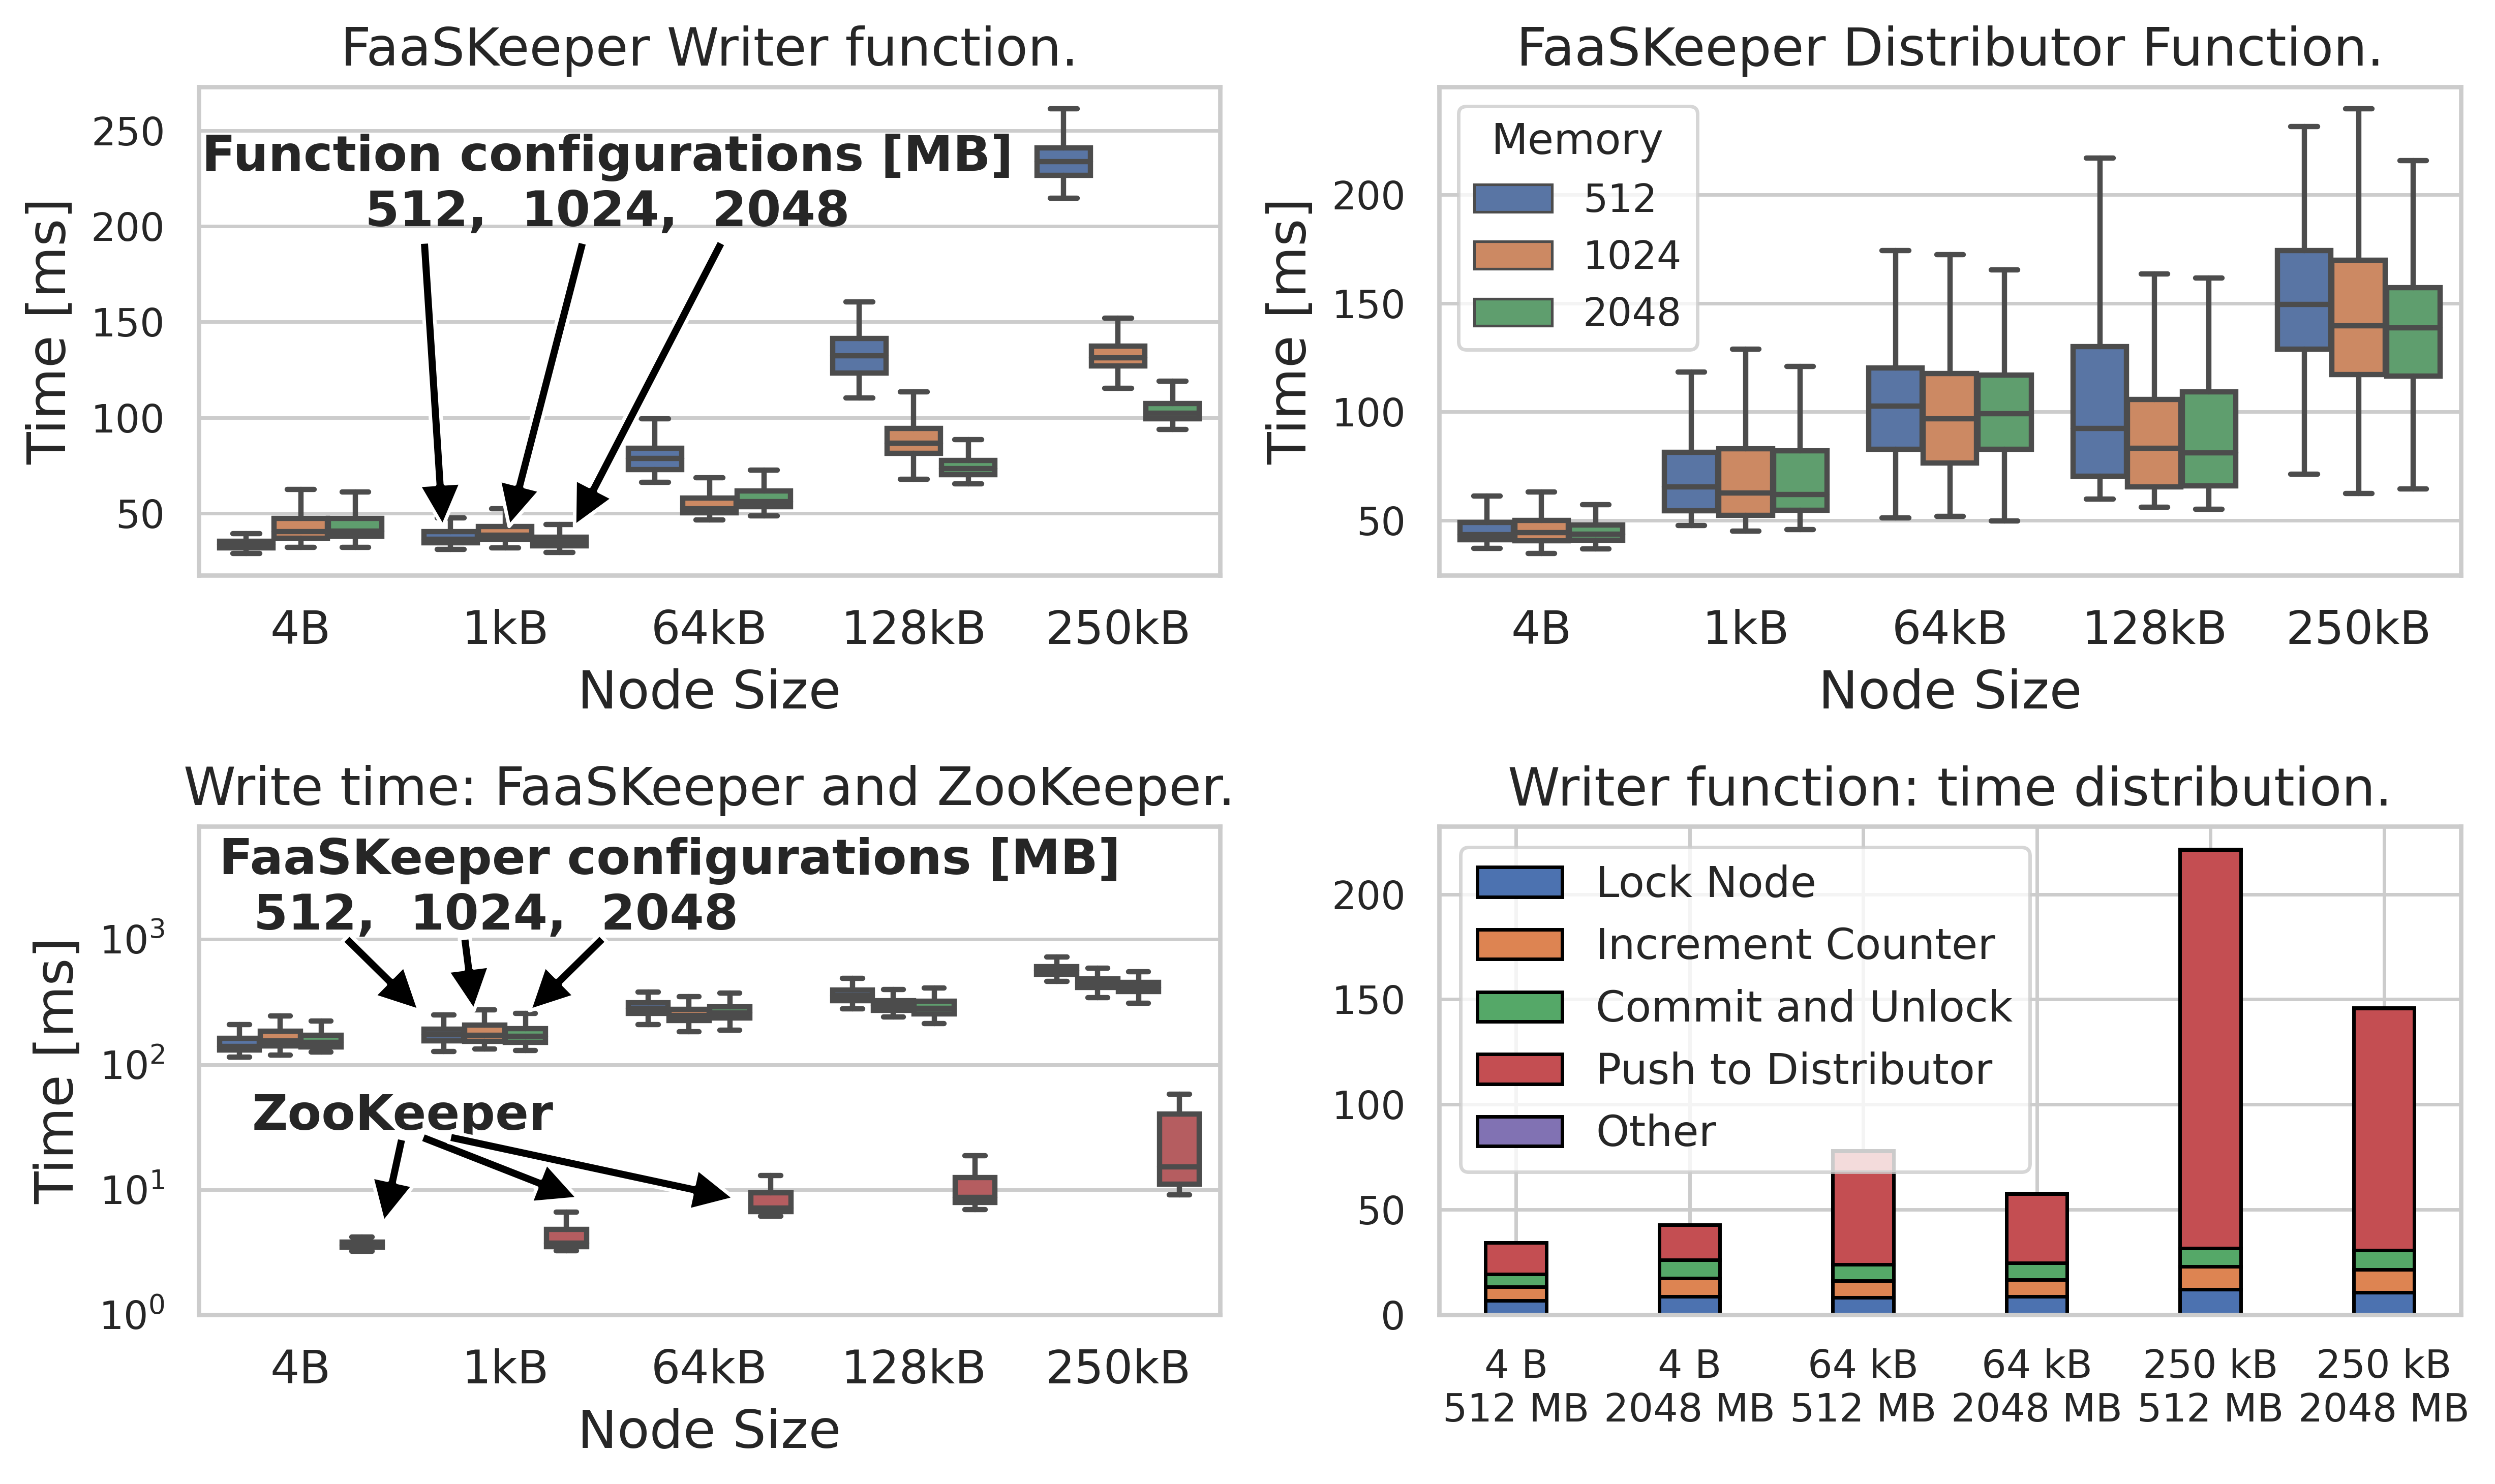

In [97]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats
from os.path import join, pardir

DATA_DIR = join(pardir, pardir, 'data', 'read')

#sns.set(rc={'figure.figsize':(16,8)})
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("whitegrid")

fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(2,4)
writer = fig3.add_subplot(gs[0, 0:2])
distr1 = fig3.add_subplot(gs[0, 2:4])
total = fig3.add_subplot(gs[1, 0:2])
barplot = fig3.add_subplot(gs[1,2:4])

# Draw a nested barplot by species and sex
dynamo_df.rename(columns={'memory': 'Memory'}, inplace=True)
#print(dynamo_df)
g = sns.boxplot(x="size", y="time",
            hue="Memory", #palette=["m", "g"],
            data=dynamo_df.loc[dynamo_df['function']=='writer'], ax=writer,showfliers=False)

handles, labels = g.get_legend_handles_labels()
#g.legend().set_visible(False)
#(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=2) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)

g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '250kB') )
g.set_xlabel('Node Size',fontsize=15)
g.set_ylabel('Time [ms]',fontsize=15)
g.set_title('FaaSKeeper Writer function.', fontsize=15)
g.tick_params(axis='x', labelsize=13)
#g.set_yscale('log')
g.legend().set_visible(False)

#for xtick in g.get_xticks():
#    print(xtick)
#    g.text(xtick,100,'100', horizontalalignment='center')#,size='x-small',color='w',weight='semibold')
                  #medians[xtick] + vertical_offset,medians[xtick], 
            #horizontalalignment='center',size='x-small',color='w',weight='semibold')

g.annotate('Function configurations [MB]\n512,  1024,  2048',fontweight='bold',
            xy=(1.5, 250), xytext=(1.5, 200), fontsize=14, ha='center')
g.annotate('', fontweight='bold',
            xy=(0.7, 35), xytext=(0.6, 200), fontsize=14,
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(1, 35), xytext=(1.4, 200), fontsize=12, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(1.3, 35), xytext=(2.1, 200), fontsize=12, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')

# Draw a nested barplot by species and sex
g = sns.boxplot(x="size", y="time",
            hue="Memory", #palette=["m", "g"],
            data=dynamo_df.loc[dynamo_df['function']=='distributor'], ax=distr1,showfliers=False)
handles, labels = g.get_legend_handles_labels()
#g.legend().set_visible(False)
g.tick_params(axis='x', labelsize=13)


#g.legend(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=2) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '250kB') )
g.set_xlabel('Node Size',fontsize=15)
g.set_ylabel('Time [ms]',fontsize=15)
g.set_title('FaaSKeeper Distributor Function.', fontsize=15)

#s3_df_client['data']/=1000.0
# Draw a nested barplot by species and sex
g = sns.boxplot(x="size", y="data",
            hue="memory", #palette=["m", "g"],
            data=dynamo_df_client.loc[dynamo_df_client['op']=='set_data'], ax=total,showfliers=False)
handles, labels = g.get_legend_handles_labels()

g.legend(handles, ['512 MB', '1024 MB', '2048 MB', 'ZooKeeper'], loc='upper left',ncol=2,fontsize=14) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '250kB') )
g.set_xlabel('Node Size',fontsize=15)
g.set_ylabel('Time [ms]',fontsize=15)
g.set_title('Write time: FaaSKeeper and ZooKeeper.', fontsize=15)
g.set_yscale('log')
g.set_ylim(1, 8000)
g.legend().set_visible(False)
g.tick_params(axis='x', labelsize=13)


#g.annotate('Functions: 512 MB, 1024 MB\nand 2048 MB.',
#            xy=(0.7, 250), xytext=(0, 1000), fontsize=12, fontweight='bold',
#            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='left')
g.annotate('FaaSKeeper configurations [MB]\n  512,  1024,  2048', fontweight='bold',
            xy=(0, 1000), xytext=(-0.4, 1200), fontsize=14, ha='left')
g.annotate('',
            xy=(0.85, 250), xytext=(0.8, 1100), fontsize=14, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(1.1, 250), xytext=(1.5, 1100), fontsize=14, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(0.6, 250), xytext=(0.2, 1100), fontsize=14, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')

g.annotate('ZooKeeper', fontweight='bold',
            xy=(0, 1000), xytext=(0.5, 30), fontsize=14, ha='center')
g.annotate('',
            xy=(0.4, 5), xytext=(0.5, 28), fontsize=12, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(1.4, 8), xytext=(0.55, 28), fontsize=12, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(2.2, 8), xytext=(0.65, 28), fontsize=12, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')


width = 0.35       # the width of the bars: can also be len(x) sequence
sum_ = [0,0,0,0,0,0]
labels = ['4 B\n512 MB', '4 B\n2048 MB', '64 kB\n512 MB', '64 kB\n2048 MB', '250 kB\n512 MB', '250 kB\n2048 MB']
for id, col in enumerate(['Lock Node', 'Increment Counter', 'Commit and Unlock', 'Push to Distributor', 'Other']):

    barplot.bar(labels, barplot_data[id], width, label=col, bottom=sum_, edgecolor='black')
    sum_ = np.add(sum_, barplot_data[id])
barplot.legend(fontsize=12)

barplot.set_title('Writer function: time distribution.', fontsize=15)
#barplot.tick_params(axis='x', labelsize=12)

plt.rcParams['figure.dpi'] = 500
plt.tight_layout()
plt.savefig("plot_small_2x2_log.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)

In [4]:
def annotate_boxplot(bpdict, annotate_params=None,
                     x_offset=0.05, x_loc=0,
                     text_offset_x=35,
                     text_offset_y=20):
    """Annotates a matplotlib boxplot with labels marking various centile levels.

    Parameters:
    - bpdict: The dict returned from the matplotlib `boxplot` function. If you're using pandas you can
    get this dict by setting `return_type='dict'` when calling `df.boxplot()`.
    - annotate_params: Extra parameters for the plt.annotate function. The default setting uses standard arrows
    and offsets the text based on other parameters passed to the function
    - x_offset: The offset from the centre of the boxplot to place the heads of the arrows, in x axis
    units (normally just 0-n for n boxplots). Values between around -0.15 and 0.15 seem to work well
    - x_loc: The x axis location of the boxplot to annotate. Usually just the number of the boxplot, counting
    from the left and starting at zero.
    text_offset_x: The x offset from the arrow head location to place the associated text, in 'figure points' units
    text_offset_y: The y offset from the arrow head location to place the associated text, in 'figure points' units
    """
    if annotate_params is None:
        annotate_params = dict(xytext=(text_offset_x, text_offset_y), textcoords='offset points', arrowprops={'arrowstyle':'->'})

    plt.annotate('Median', (x_loc + 1 + x_offset, bpdict['medians'][x_loc].get_ydata()[0]), **annotate_params)
    plt.annotate('25%', (x_loc + 1 + x_offset, bpdict['boxes'][x_loc].get_ydata()[0]), **annotate_params)
    plt.annotate('75%', (x_loc + 1 + x_offset, bpdict['boxes'][x_loc].get_ydata()[2]), **annotate_params)
    plt.annotate('5%', (x_loc + 1 + x_offset, bpdict['caps'][x_loc*2].get_ydata()[0]), **annotate_params)
    plt.annotate('95%', (x_loc + 1 + x_offset, bpdict['caps'][(x_loc*2)+1].get_ydata()[0]), **annotate_params)

# Analysis of data noise

In [58]:
import pandas as pd
import numpy as np
import os
from os.path import join, pardir
DATA_DIR = join(pardir, pardir, 'data', 'write_new')
DATA_DIR_ZK = join(pardir, pardir, 'data', 'write_zookeeper')

dfs = []
dfs2 = []
for mem in [512, 1024, 2048]:
    
    for size in [4, 131072]: #, 1024, 65536, 131072, 256000]:
        df = pd.read_csv(join(DATA_DIR, f'persistent_{size}_{mem}_processed.csv'), index_col=0)
        df['size'] = size / 1024
        
        #print(df)
        # data is broken :-(
        #df = df.loc[df['memory'] == mem]
        #df = df.groupby(['memory', 'function']).head(150).reset_index(drop=True)
        #if df.shape[0] > 200:
        #    print(size, mem)
        dfs.append(df)
        
        
        #zk = pd.read_csv(join(DATA_DIR, f'persistent_{size}_{mem}_processed.csv'), index_col=0)
        
        
        df = pd.read_csv(join(DATA_DIR, f'persistent_{size}_{mem}.csv'), index_col=0)
        #df = df.groupby(['memory', 'size']).head(100).reset_index(drop=True)
        df['size'] = size / 1024
        df['data'] /= 1000.0
        #df.loc[df['op'] == 'set_data', 'data'] /= 1000
        dfs2.append(df)

#for size in [4, 1024, 65536, 131072, 256000]:
#    df = pd.read_csv(join(DATA_DIR_ZK, f'interregion_{size}.csv'), index_col=0)
#    df['data'] /= 1000.0
#    df['size'] /= 1024.0
#    df['memory'] = 'ZooKeeper'
#    dfs2.append(df)
       
dynamo_df = pd.concat(dfs)
dynamo_df['system'] = 'persistent'
dynamo_df_client = pd.concat(dfs2)
dynamo_df_client['system'] = 'persistent'
#print(dynamo_df_client.loc[dynamo_df_client['memory'] == 'ZooKeeper'])
#print(dynamo_df)

print(dynamo_df)
print(dynamo_df_client)

                                  request    time  billed_time  memory  \
0    d8bf358a-7b2b-5487-ae67-69b03aba6f46   52.53           53     512   
1    ae5c4cb8-4478-5773-a258-108205e9e288   46.85           47     512   
2    f9c024b1-083d-586c-8afe-788b49ac0f51   38.32           39     512   
3    f34401d3-3911-5ea3-9036-5de97881d931   40.40           41     512   
4    72173e51-4e8f-55d0-be2c-626b0f1fde4b   34.20           35     512   
..                                    ...     ...          ...     ...   
484  9a08a275-d51c-5a02-861a-fe4f9062fdb2   66.74           67    2048   
485  e653a88c-d864-574a-8800-f4b69d18ca19   87.40           88    2048   
486  32afde1a-7096-57de-a294-822035ea37a2   69.38           70    2048   
487  db072f95-d951-5cca-ba1c-73af9c2da704   72.15           73    2048   
488  e8c0e5f8-9aac-55d6-b296-b9c2dfd0ccc4  148.98          149    2048   

     used_memory                                  read  write     function  \
0             76  d8bf358a-7b2b-5

In [59]:
import pandas as pd
import numpy as np
import os
from os.path import join, pardir
DATA_DIR = join(pardir, pardir, 'data', 'write_s3')
DATA_DIR_ZK = join(pardir, pardir, 'data', 'write_zookeeper')

dfs = []
dfs2 = []
for mem in [512, 1024, 2048]:
    
    for size in [4, 131072]: #, 1024, 65536, 131072, 256000]:
        df = pd.read_csv(join(DATA_DIR, f'persistent_{size}_{mem}_processed.csv'), index_col=0)
        df['size'] = size / 1024
        
        #print(df)
        # data is broken :-(
        #df = df.loc[df['memory'] == mem]
        #df = df.groupby(['memory', 'function']).head(150).reset_index(drop=True)
        #if df.shape[0] > 200:
        #    print(size, mem)
        dfs.append(df)
        
        
        zk = pd.read_csv(join(DATA_DIR, f'persistent_{size}_{mem}_processed.csv'), index_col=0)
        
        
        df = pd.read_csv(join(DATA_DIR, f'persistent_{size}_{mem}.csv'), index_col=0)
        #df = df.groupby(['memory', 'size']).head(100).reset_index(drop=True)
        df['size'] = size / 1024
        df['data'] /= 1000.0
        #df.loc[df['op'] == 'set_data', 'data'] /= 1000
        dfs2.append(df)

for size in [4, 1024, 65536, 131072, 256000]:
    df = pd.read_csv(join(DATA_DIR_ZK, f'interregion_{size}.csv'), index_col=0)
    df['data'] /= 1000.0
    df['size'] /= 1024.0
    df['memory'] = 'ZooKeeper'
    dfs2.append(df)

        
dynamo_df_old = pd.concat(dfs)
dynamo_df_old['system'] = 'persistent'
dynamo_df_client_old = pd.concat(dfs2)
dynamo_df_client_old['system'] = 'persistent'
#print(dynamo_df_client.loc[dynamo_df_client['memory'] == 'ZooKeeper'])
#print(dynamo_df)



0        0.003906
1        0.003906
2        0.003906
3        0.003906
4        0.003906
          ...    
98     128.000000
99     128.000000
100    128.000000
101    128.000000
102    128.000000
Name: size, Length: 618, dtype: float64
(0.00390625, 2048)
    index     data  client_write_data        op  memory      size      system
0       1  206.957            42636.0  set_data    2048  0.003906  persistent
1       2  175.591            14031.0  set_data    2048  0.003906  persistent
2       3  179.771            17474.0  set_data    2048  0.003906  persistent
3       4  161.168            31743.0  set_data    2048  0.003906  persistent
4       5  253.266            27900.0  set_data    2048  0.003906  persistent
..    ...      ...                ...       ...     ...       ...         ...
94     95  136.888            14159.0  set_data    2048  0.003906  persistent
95     96  198.112            14396.0  set_data    2048  0.003906  persistent
96     97  189.555            10891.0  se

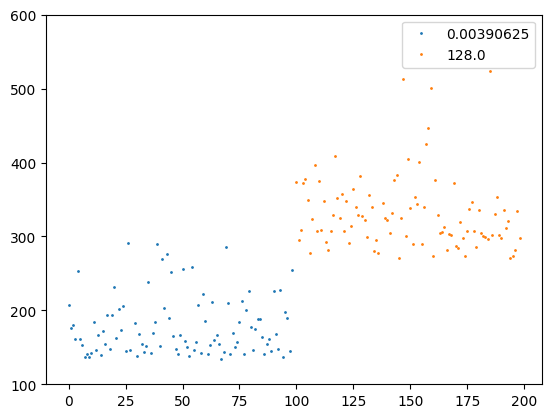

In [82]:
import matplotlib.pyplot as plt
# new data
print(dynamo_df_client['size'])
df = dynamo_df_client.loc[(dynamo_df_client.memory == 2048) &(dynamo_df_client.op == 'set_data')]
df = df.iloc[1:].reset_index()

groups = df.groupby('size')

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.data, marker='o', linestyle='', ms=1, label=name)
ax.set_ylim(100, 600)
ax.legend()
#.plot.scatter(x='index', y='data', c='size')


new_data = []

for name, group in df.groupby(['size', 'memory']):
    
    print(name)
    print(group)
    new_data.append(group.loc[group.data < group.data.quantile(0.75)])
new_data = pd.concat(new_data, axis=0)

print(new_data)
groups = new_data.groupby('size')
print("New data,    4 B,     128 kB")
print('Mean', groups['data'].mean().values)
print('Median', groups['data'].median().values)
print('Std', groups['data'].std().values)
print('CoV', groups['data'].std().values / groups['data'].mean().values)

(0.00390625, 2048)
     index     data  client_write_data        op memory      size      system
0        1  149.639            13565.0  set_data   2048  0.003906  persistent
1        2  145.962            13209.0  set_data   2048  0.003906  persistent
2        3  150.894            12582.0  set_data   2048  0.003906  persistent
3        4  147.974            42287.0  set_data   2048  0.003906  persistent
4        5  134.865            12874.0  set_data   2048  0.003906  persistent
..     ...      ...                ...       ...    ...       ...         ...
194    195  173.048            11264.0  set_data   2048  0.003906  persistent
195    196  156.647            11647.0  set_data   2048  0.003906  persistent
196    197  130.482            10148.0  set_data   2048  0.003906  persistent
197    198  138.389            12413.0  set_data   2048  0.003906  persistent
198    199  138.146             9862.0  set_data   2048  0.003906  persistent

[199 rows x 7 columns]
(128.0, 2048)
     in

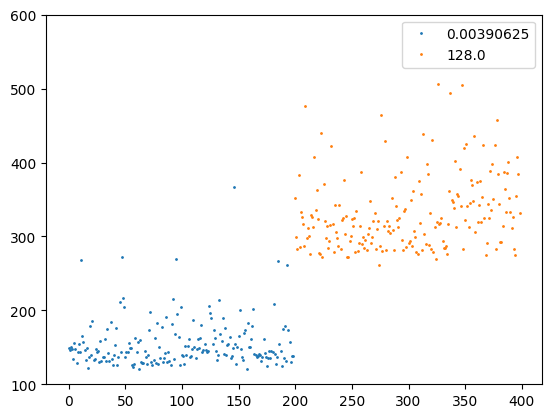

In [83]:
#df = dynamo_df_client_old.loc[(dynamo_df_client_old.memory == 2048) & (dynamo_df_client_old.op == 'set_data')]
#df.iloc[1:].reset_index().plot.scatter(x='index', y='data')

import matplotlib.pyplot as plt
# new data
#print(dynamo_df_client['size'])
df = dynamo_df_client_old.loc[(dynamo_df_client_old.memory == 2048) &(dynamo_df_client_old.op == 'set_data')]
df = df.iloc[1:].reset_index()

groups = df.groupby('size')

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.data, marker='o', linestyle='', ms=1, label=name)
ax.set_ylim(100, 600)
ax.legend()
#.plot.scatter(x='index', y='data', c='size')


new_data = []

for name, group in df.groupby(['size', 'memory']):
    
    print(name)
    print(group)
    new_data.append(group.loc[group.data < group.data.quantile(0.75)])
new_data = pd.concat(new_data, axis=0)

print(new_data)
groups = new_data.groupby('size')
print("Old data,    4 B,     128 kB")
print('Mean', groups['data'].mean().values)
print('Median', groups['data'].median().values)
print('Std', groups['data'].std().values)
print('CoV', groups['data'].std().values / groups['data'].mean().values)


In [66]:
print(dynamo_df_old.groupby(['function', 'size', 'memory'])['time'].median())

print(dynamo_df.groupby(['function', 'size', 'memory'])['time'].median())

function     size        memory
distributor  0.003906    512        92.830
                         1024       90.730
                         2048       80.315
             128.000000  512       128.420
                         1024      122.940
                         2048      121.730
writer       0.003906    512        35.260
                         1024       34.840
                         2048       35.940
             128.000000  512       161.380
                         1024       97.160
                         2048       87.410
Name: time, dtype: float64
function     size        memory
distributor  0.003906    512        69.120
                         1024       64.255
                         2048       53.520
             128.000000  512        92.530
                         1024       91.230
                         2048       86.750
writer       0.003906    512        34.320
                         1024       37.930
                         2048       38.180
      

# Data 

In [84]:
import pandas as pd
import numpy as np
import os
from os.path import join, pardir
DATA_DIR = join(pardir, pardir, 'data', 'write_new')
DATA_DIR_ZK = join(pardir, pardir, 'data', 'write_zookeeper')

dfs = []
dfs2 = []
for mem in [512, 1024, 2048]:
    
    for size in [4, 1024, 65536, 131072, 256000]:
        df = pd.read_csv(join(DATA_DIR, f'persistent_{size}_{mem}_processed.csv'), index_col=0)
        df['size'] = size / 1024
        
        #print(df)
        # data is broken :-(
        #df = df.loc[df['memory'] == mem]
        #df = df.groupby(['memory', 'function']).head(150).reset_index(drop=True)
        #if df.shape[0] > 200:
        #    print(size, mem)
        dfs.append(df)
        
        
        zk = pd.read_csv(join(DATA_DIR, f'persistent_{size}_{mem}_processed.csv'), index_col=0)
        
        
        df = pd.read_csv(join(DATA_DIR, f'persistent_{size}_{mem}.csv'), index_col=0)
        #df = df.groupby(['memory', 'size']).head(100).reset_index(drop=True)
        df['size'] = size / 1024
        df['data'] /= 1000.0
        #df.loc[df['op'] == 'set_data', 'data'] /= 1000
        dfs2.append(df)

for size in [4, 1024, 65536, 131072, 256000]:
    df = pd.read_csv(join(DATA_DIR_ZK, f'interregion_{size}.csv'), index_col=0)
    df['data'] /= 1000.0
    df['size'] /= 1024.0
    df['memory'] = 'ZooKeeper'
    dfs2.append(df)

        
dynamo_df = pd.concat(dfs)
dynamo_df['system'] = 'persistent'
dynamo_df_client = pd.concat(dfs2)
dynamo_df_client['system'] = 'persistent'
print(dynamo_df_client.loc[dynamo_df_client['memory'] == 'ZooKeeper'])
print(dynamo_df)



       data  client_write_data        op     memory        size      system
0     4.074                NaN  set_data  ZooKeeper    0.003906  persistent
1     4.041                NaN  set_data  ZooKeeper    0.003906  persistent
2     3.772                NaN  set_data  ZooKeeper    0.003906  persistent
3     3.598                NaN  set_data  ZooKeeper    0.003906  persistent
4     3.351                NaN  set_data  ZooKeeper    0.003906  persistent
..      ...                ...       ...        ...         ...         ...
145  34.913                NaN  set_data  ZooKeeper  250.000000  persistent
146   9.084                NaN  set_data  ZooKeeper  250.000000  persistent
147  34.226                NaN  set_data  ZooKeeper  250.000000  persistent
148   9.794                NaN  set_data  ZooKeeper  250.000000  persistent
149  57.683                NaN  set_data  ZooKeeper  250.000000  persistent

[750 rows x 6 columns]
                                  request    time  billed_time  

In [89]:

DATA_DIR = join(pardir, pardir, 'data', 'write_new')
dfs = []

# lock atomic commit push rest
barplot_data = [[],[],[],[],[]]
#barplot_stds = [[],[],[],[],[],[]]
#for size in [4, 1024, 65536, 131072, 256000]:
size = 4
memory = 512
df = pd.read_csv(join(DATA_DIR, f'persistent_{size}_summary.csv'),index_col=None)
df['size'] = size / 1024.0
df['value'] *= 1000.0
df['value'] /= df['repetitions']
print(df.loc[(df['memory'] == memory) & (df['function'] == 'writer')])

barplot_data[0].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'lock')]['value'].values[0])
barplot_data[1].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'atomic')]['value'].values[0])
barplot_data[2].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'commit')]['value'].values[0])
barplot_data[3].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'push')]['value'].values[0])
total = df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'total')]['value'].values[0]
barplot_data[4].append(
    total
    - barplot_data[0][-1] - barplot_data[1][-1] - barplot_data[2][-1] - barplot_data[3][-1]
)
#for i in range(5):
#    barplot_data[i][-1] /= total

memory = 2048
barplot_data[0].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'lock')]['value'].values[0])
barplot_data[1].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'atomic')]['value'].values[0])
barplot_data[2].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'commit')]['value'].values[0])
barplot_data[3].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'push')]['value'].values[0])
total = df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'total')]['value'].values[0]
barplot_data[4].append(
    total
    - barplot_data[0][-1] - barplot_data[1][-1] - barplot_data[2][-1] - barplot_data[3][-1]
)
#for i in range(5):
#    barplot_data[i][-1] /= total


size = 65536
memory = 512
df = pd.read_csv(join(DATA_DIR, f'persistent_{size}_summary.csv'),index_col=None)
df['size'] = size / 1024.0
df['value'] *= 1000.0
df['value'] /= df['repetitions']
barplot_data[0].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'lock')]['value'].values[0])
barplot_data[1].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'atomic')]['value'].values[0])
barplot_data[2].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'commit')]['value'].values[0])
barplot_data[3].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'push')]['value'].values[0])
total = df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'total')]['value'].values[0]
barplot_data[4].append(
    total
    - barplot_data[0][-1] - barplot_data[1][-1] - barplot_data[2][-1] - barplot_data[3][-1]
)
#for i in range(5):
#    barplot_data[i][-1] /= total



memory = 2048
barplot_data[0].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'lock')]['value'].values[0])
barplot_data[1].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'atomic')]['value'].values[0])
barplot_data[2].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'commit')]['value'].values[0])
barplot_data[3].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'push')]['value'].values[0])
total = df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'total')]['value'].values[0]
barplot_data[4].append(
    total
    - barplot_data[0][-1] - barplot_data[1][-1] - barplot_data[2][-1] - barplot_data[3][-1]
)
#for i in range(5):
#    barplot_data[i][-1] /= total

size = 256000
memory = 512
df = pd.read_csv(join(DATA_DIR, f'persistent_{size}_summary.csv'),index_col=None)
df['size'] = size / 1024.0
#print(df)
df['value'] *= 1000.0
df['value'] /= df['repetitions']
barplot_data[0].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'lock')]['value'].values[0])
barplot_data[1].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'atomic')]['value'].values[0])
barplot_data[2].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'commit')]['value'].values[0])
barplot_data[3].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'push')]['value'].values[0])
total = df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'total')]['value'].values[0]
barplot_data[4].append(
    total
    - barplot_data[0][-1] - barplot_data[1][-1] - barplot_data[2][-1] - barplot_data[3][-1]
)
#for i in range(5):
#    barplot_data[i][-1] /= total



memory = 2048
barplot_data[0].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'lock')]['value'].values[0])
barplot_data[1].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'atomic')]['value'].values[0])
barplot_data[2].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'commit')]['value'].values[0])
barplot_data[3].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'push')]['value'].values[0])
total = df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'total')]['value'].values[0]
barplot_data[4].append(
    total
    - barplot_data[0][-1] - barplot_data[1][-1] - barplot_data[2][-1] - barplot_data[3][-1]
)
#for i in range(5):
#    barplot_data[i][-1] /= total

print(barplot_data)

      type      value  memory function  repetitions      size
10   total  34.285431     512   writer          200  0.003906
11    lock   6.875050     512   writer          200  0.003906
12  atomic   6.365731     512   writer          200  0.003906
13  commit   6.215975     512   writer          200  0.003906
14    push  14.806868     512   writer          200  0.003906
[[6.875050067901612, 8.789880275726318, 8.336803913116455, 8.813973665237427, 12.075574398040771, 10.738768577575684], [6.3657307624816895, 8.764091730117798, 7.974588871002198, 7.887829542160034, 10.970770120620726, 10.867022275924683], [6.215975284576416, 8.515704870223999, 7.598031759262085, 8.014299869537354, 8.755810260772705, 9.13293719291687], [14.806867837905884, 16.734914779663086, 54.07837271690368, 32.95866847038269, 189.4632947444916, 115.13480186462402], [0.021806955337524414, 0.023578405380249023, 0.024029016494772293, 0.027037858963012695, 0.026711225509615133, 0.034395456314086914]]


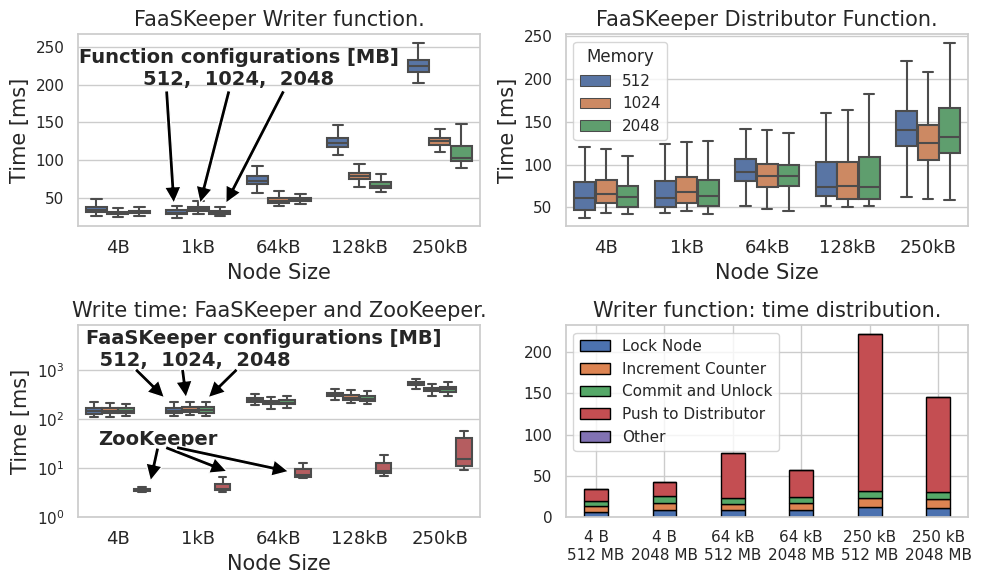

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats
from os.path import join, pardir

DATA_DIR = join(pardir, pardir, 'data', 'read')

#sns.set(rc={'figure.figsize':(16,8)})
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("whitegrid")

fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(2,4)
writer = fig3.add_subplot(gs[0, 0:2])
distr1 = fig3.add_subplot(gs[0, 2:4])
total = fig3.add_subplot(gs[1, 0:2])
barplot = fig3.add_subplot(gs[1,2:4])

# Draw a nested barplot by species and sex
dynamo_df.rename(columns={'memory': 'Memory'}, inplace=True)
#print(dynamo_df)
g = sns.boxplot(x="size", y="time",
            hue="Memory", #palette=["m", "g"],
            data=dynamo_df.loc[dynamo_df['function']=='writer'], ax=writer,showfliers=False)

handles, labels = g.get_legend_handles_labels()
#g.legend().set_visible(False)
#(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=2) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)

g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '250kB') )
g.set_xlabel('Node Size',fontsize=15)
g.set_ylabel('Time [ms]',fontsize=15)
g.set_title('FaaSKeeper Writer function.', fontsize=15)
g.tick_params(axis='x', labelsize=13)
#g.set_yscale('log')
g.legend().set_visible(False)

#for xtick in g.get_xticks():
#    print(xtick)
#    g.text(xtick,100,'100', horizontalalignment='center')#,size='x-small',color='w',weight='semibold')
                  #medians[xtick] + vertical_offset,medians[xtick], 
            #horizontalalignment='center',size='x-small',color='w',weight='semibold')

g.annotate('Function configurations [MB]\n512,  1024,  2048',fontweight='bold',
            xy=(1.5, 200), xytext=(1.5, 200), fontsize=14, ha='center')
g.annotate('', fontweight='bold',
            xy=(0.7, 35), xytext=(0.6, 200), fontsize=14,
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(1, 35), xytext=(1.4, 200), fontsize=12, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(1.3, 35), xytext=(2.1, 200), fontsize=12, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')

# Draw a nested barplot by species and sex
g = sns.boxplot(x="size", y="time",
            hue="Memory", #palette=["m", "g"],
            data=dynamo_df.loc[dynamo_df['function']=='distributor'], ax=distr1,showfliers=False)
handles, labels = g.get_legend_handles_labels()
#g.legend().set_visible(False)
g.tick_params(axis='x', labelsize=13)


#g.legend(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=2) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '250kB') )
g.set_xlabel('Node Size',fontsize=15)
g.set_ylabel('Time [ms]',fontsize=15)
g.set_title('FaaSKeeper Distributor Function.', fontsize=15)

#s3_df_client['data']/=1000.0
# Draw a nested barplot by species and sex
g = sns.boxplot(x="size", y="data",
            hue="memory", #palette=["m", "g"],
            data=dynamo_df_client.loc[dynamo_df_client['op']=='set_data'], ax=total,showfliers=False)
handles, labels = g.get_legend_handles_labels()

g.legend(handles, ['512 MB', '1024 MB', '2048 MB', 'ZooKeeper'], loc='upper left',ncol=2) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
xg.set_title('Write time: FaaSKeeper and ZooKeeper.', fontsize=15)
g.set_yscale('log')
g.set_ylim(1, 8000)
g.legend().set_visible(False)
g.tick_params(axis='x', labelsize=13)


#g.annotate('Functions: 512 MB, 1024 MB\nand 2048 MB.',
#            xy=(0.7, 250), xytext=(0, 1000), fontsize=12, fontweight='bold',
#            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='left')
g.annotate('FaaSKeeper configurations [MB]\n  512,  1024,  2048', fontweight='bold',
            xy=(0, 1000), xytext=(-0.4, 1200), fontsize=14, ha='left')
g.annotate('',
            xy=(0.85, 250), xytext=(0.8, 1100), fontsize=14, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(1.1, 250), xytext=(1.5, 1100), fontsize=14, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(0.6, 250), xytext=(0.2, 1100), fontsize=14, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')

g.annotate('ZooKeeper', fontweight='bold',
            xy=(0, 1000), xytext=(0.5, 30), fontsize=14, ha='center')
g.annotate('',
            xy=(0.4, 5), xytext=(0.5, 28), fontsize=12, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(1.4, 8), xytext=(0.55, 28), fontsize=12, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(2.2, 8), xytext=(0.65, 28), fontsize=12, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')


width = 0.35       # the width of the bars: can also be len(x) sequence
sum_ = [0,0,0,0,0,0]
labels = ['4 B\n512 MB', '4 B\n2048 MB', '64 kB\n512 MB', '64 kB\n2048 MB', '250 kB\n512 MB', '250 kB\n2048 MB']
for id, col in enumerate(['Lock Node', 'Increment Counter', 'Commit and Unlock', 'Push to Distributor', 'Other']):

    barplot.bar(labels, barplot_data[id], width, label=col, bottom=sum_, edgecolor='black')
    sum_ = np.add(sum_, barplot_data[id])
barplot.legend()

barplot.set_title('Writer function: time distribution.', fontsize=15)
#barplot.tick_params(axis='x', labelsize=12)

plt.rcParams['figure.dpi'] = 500
plt.tight_layout()
plt.savefig("new_plot_small_2x2_log.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)

In [5]:
import pandas as pd
import numpy as np
import os
from os.path import join, pardir
DATA_DIR = join(pardir, pardir, 'data', 'write_new_algorithm', 'keyvalue')
DATA_DIR_ZK = join(pardir, pardir, 'data', 'write_zookeeper')

dfs = []
dfs2 = []
for mem in [512, 1024, 2048]:
    
    for size in [4, 128, 256, 512, 1024,2048,4096]:
        df = pd.read_csv(join(DATA_DIR, f'persistent_{size}_{mem}_processed.csv'), index_col=0)
        df['size'] = size / 1024
        
        #print(df)
        # data is broken :-(
        #df = df.loc[df['memory'] == mem]
        #df = df.groupby(['memory', 'function']).head(150).reset_index(drop=True)
        #if df.shape[0] > 200:
        #    print(size, mem)
        dfs.append(df)
        
        
        zk = pd.read_csv(join(DATA_DIR, f'persistent_{size}_{mem}_processed.csv'), index_col=0)
        
        
        df = pd.read_csv(join(DATA_DIR, f'persistent_{size}_{mem}.csv'), index_col=0)
        #df = df.groupby(['memory', 'size']).head(100).reset_index(drop=True)
        df['size'] = size / 1024
        df['data'] /= 1000.0
        #df.loc[df['op'] == 'set_data', 'data'] /= 1000
        dfs2.append(df)
        
        
dynamo_df = pd.concat(dfs)
dynamo_df['system'] = 'persistent'
dynamo_df_client = pd.concat(dfs2)
dynamo_df_client['system'] = 'persistent'
print(dynamo_df)
print(dynamo_df_client)



                                  request   time  billed_time  memory  \
0    a41cd615-0c35-5688-a6f7-8ba9a245aad7  42.76           43     512   
1    d0c809ba-e881-5071-ba96-540646f194fc  29.66           30     512   
2    1d29af01-850c-5681-8542-f2bd2b63dcca  26.05           27     512   
3    aa2bf827-5c95-5397-b167-a59bf2fa15b3  31.52           32     512   
4    d77cea66-1709-59a3-9a89-b7dab96693c2  26.10           27     512   
..                                    ...    ...          ...     ...   
746  30ed80b4-b749-5ea2-863e-dd080b2f1da2  27.03           28    2048   
747  276a6f4c-ae18-536a-b4ea-32f0127d6449  24.13           25    2048   
748  650d0b46-564b-501d-ad03-56faea2e0f26  23.93           24    2048   
749  3807f496-3ecc-594b-b648-a92a82a9ac82  25.22           26    2048   
750  53c48000-eee4-5886-b297-ddbc52ac06ab  46.33           47    2048   

     used_memory                                  read  write     function  \
0             75  a41cd615-0c35-5688-a6f7-8ba

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats
from os.path import join, pardir

DATA_DIR = join(pardir, pardir, 'data', 'read')

#sns.set(rc={'figure.figsize':(16,8)})
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("whitegrid")

fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(2,4)
writer = fig3.add_subplot(gs[0, 0:2])
distr1 = fig3.add_subplot(gs[0, 2:4])
total = fig3.add_subplot(gs[1, 0:2])
barplot = fig3.add_subplot(gs[1,2:4])

# Draw a nested barplot by species and sex
dynamo_df.rename(columns={'memory': 'Memory'}, inplace=True)
#print(dynamo_df)
g = sns.boxplot(x="size", y="time",
            hue="Memory", #palette=["m", "g"],
            data=dynamo_df.loc[dynamo_df['function']=='writer'], ax=writer,showfliers=False)

handles, labels = g.get_legend_handles_labels()
#g.legend().set_visible(False)
#(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=2) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)

g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '250kB') )
g.set_xlabel('Node Size',fontsize=15)
g.set_ylabel('Time [ms]',fontsize=15)
g.set_title('FaaSKeeper Writer function.', fontsize=15)
g.tick_params(axis='x', labelsize=13)
#g.set_yscale('log')
g.legend().set_visible(False)

#for xtick in g.get_xticks():
#    print(xtick)
#    g.text(xtick,100,'100', horizontalalignment='center')#,size='x-small',color='w',weight='semibold')
                  #medians[xtick] + vertical_offset,medians[xtick], 
            #horizontalalignment='center',size='x-small',color='w',weight='semibold')

g.annotate('Function configurations [MB]\n512,  1024,  2048',fontweight='bold',
            xy=(1.5, 200), xytext=(1.5, 200), fontsize=14, ha='center')
g.annotate('', fontweight='bold',
            xy=(0.7, 35), xytext=(0.6, 200), fontsize=14,
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(1, 35), xytext=(1.4, 200), fontsize=12, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(1.3, 35), xytext=(2.1, 200), fontsize=12, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')

# Draw a nested barplot by species and sex
g = sns.boxplot(x="size", y="time",
            hue="Memory", #palette=["m", "g"],
            data=dynamo_df.loc[dynamo_df['function']=='distributor'], ax=distr1,showfliers=False)
handles, labels = g.get_legend_handles_labels()
#g.legend().set_visible(False)
g.tick_params(axis='x', labelsize=13)


#g.legend(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=2) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '250kB') )
g.set_xlabel('Node Size',fontsize=15)
g.set_ylabel('Time [ms]',fontsize=15)
g.set_title('FaaSKeeper Distributor Function.', fontsize=15)

#s3_df_client['data']/=1000.0
# Draw a nested barplot by species and sex
g = sns.boxplot(x="size", y="data",
            hue="memory", #palette=["m", "g"],
            data=dynamo_df_client.loc[dynamo_df_client['op']=='set_data'], ax=total,showfliers=False)
handles, labels = g.get_legend_handles_labels()

g.legend(handles, ['512 MB', '1024 MB', '2048 MB', 'ZooKeeper'], loc='upper left',ncol=2) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '250kB') )
g.set_xlabel('Node Size',fontsize=15)
g.set_ylabel('Time [ms]',fontsize=15)
g.set_title('Write time: FaaSKeeper and ZooKeeper.', fontsize=15)
g.set_yscale('log')
g.set_ylim(1, 8000)
g.legend().set_visible(False)
g.tick_params(axis='x', labelsize=13)


#g.annotate('Functions: 512 MB, 1024 MB\nand 2048 MB.',
#            xy=(0.7, 250), xytext=(0, 1000), fontsize=12, fontweight='bold',
#            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='left')
g.annotate('FaaSKeeper configurations [MB]\n  512,  1024,  2048', fontweight='bold',
            xy=(0, 1000), xytext=(-0.4, 1200), fontsize=14, ha='left')
g.annotate('',
            xy=(0.85, 250), xytext=(0.8, 1100), fontsize=14, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(1.1, 250), xytext=(1.5, 1100), fontsize=14, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(0.6, 250), xytext=(0.2, 1100), fontsize=14, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')

g.annotate('ZooKeeper', fontweight='bold',
            xy=(0, 1000), xytext=(0.5, 30), fontsize=14, ha='center')
g.annotate('',
            xy=(0.4, 5), xytext=(0.5, 28), fontsize=12, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(1.4, 8), xytext=(0.55, 28), fontsize=12, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(2.2, 8), xytext=(0.65, 28), fontsize=12, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')

#barplot.tick_params(axis='x', labelsize=12)

#plt.rcParams['figure.dpi'] = 500
#plt.tight_layout()
#plt.savefig("new_plot_small_2x2_log.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)

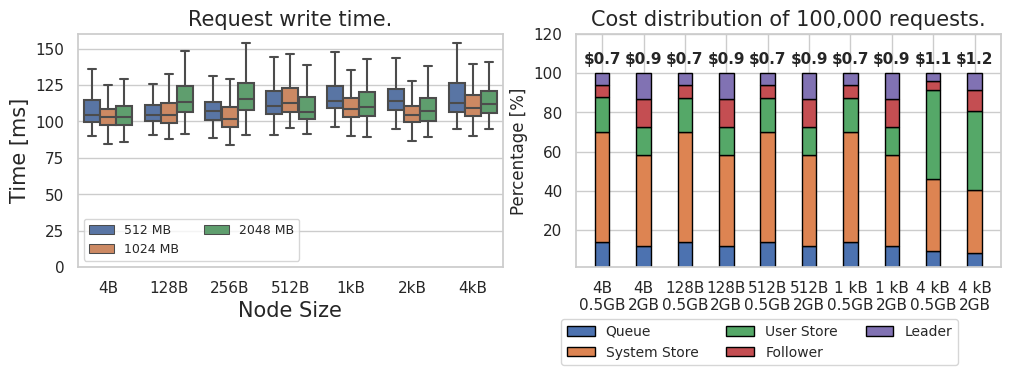

In [79]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats
from os.path import join, pardir

DATA_DIR = join(pardir, pardir, 'data', 'read')

#sns.set(rc={'figure.figsize':(16,8)})
#sns.set(rc={'figure.figsize':(10,3)})
sns.set(rc={'figure.figsize':(10,3.5)})
sns.set_style("whitegrid")

fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(1,4)
barplot = fig3.add_subplot(gs[0,0:2])
total_cost = fig3.add_subplot(gs[0,2:4])


g = sns.boxplot(x="size", y="data",
            hue="memory", #palette=["m", "g"],
            data=dynamo_df_client.loc[dynamo_df_client['op']=='set_data'], ax=barplot,showfliers=False)
g.set_xticklabels( ('4B', '128B', '256B', '512B', '1kB', '2kB', '4kB') )
g.set_xlabel('Node Size',fontsize=15)
g.set_ylabel('Time [ms]',fontsize=15)
g.set_ylim(0, 160)

handles, labels = g.get_legend_handles_labels()
g.legend(handles, [f"{m} MB" for m in labels], fontsize=9, ncol=2) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_title('Request write time.', fontsize=15)

width = 0.35       # the width of the bars: can also be len(x) sequence
#sum_ = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#labels = ['4 B\n512 MB', '4 B\n2048 MB','128 B\n512 MB', '128 B\n2048 MB',  
#          '256 B\n512 MB', '256 B\n2048 MB', '512 kB\n512 MB', '512 kB\n2048 MB',
#          '1 kB\n512 MB', '1 kB\n2048 MB', '2 kB\n512 MB', '2 kB\n2048 MB',
#          '4 kB\n512 MB', '4 kB\n2048 MB'
#]
sum_ = [0,0,0,0,0,0,0,0,0,0]
labels = ['4B\n0.5GB', '4B\n2GB','128B\n0.5GB', '128B\n2GB',  
          '512B\n0.5GB', '512B\n2GB',
          '1 kB\n0.5GB', '1 kB\n2GB',
          '4 kB\n0.5GB', '4 kB\n2GB'
]
for id, col in enumerate(['Queue', 'System Store', 'User Store', 'Follower', 'Leader']):

    total_cost.bar(labels, cost_data[id], width, label=col, bottom=sum_, edgecolor='black')
    sum_ = np.add(sum_, cost_data[id])

total_cost.legend(loc='upper left')
total_cost.set_ylabel('Percentage [%]')
#total_cost.legend(bbox_to_anchor=(-0.05, -0.6), ncols=3,loc="lower left",fontsize=10)
total_cost.legend(bbox_to_anchor=(-0.05, -0.45), ncols=3,loc="lower left",fontsize=10)

sizes = np.array([4, 128, 512, 1024, 4096],dtype=np.float64)
sizes /= 1024.0
cnt = 0
for i in range(5):
    
    for j in [512,2048]:
        d = sums_prices[(sizes[i], j)]
        total_cost.annotate(f'${d}', xy=(cnt, 105), ha='center', fontweight='bold', fontsize=11)
        cnt+= 1

total_cost.set_ylim(1, 120)
total_cost.set_title('Cost distribution of 100,000 requests.', fontsize=15)

#width = 0.35       # the width of the bars: can also be len(x) sequence
#sum_ = [0,0,0,0,0,0]
#labels = ['4 B\n512 MB', '4 B\n2048 MB', '64 kB\n512 MB', '64 kB\n2048 MB', '250 kB\n512 MB', '250 kB\n2048 MB']
#for id, col in enumerate(['Lock Node', 'Commit and Unlock', 'Push to Distributor', 'Other']):#

#    print(barplot_data_writer[id])
#    barplot.bar(labels, barplot_data_writer[id], width, label=col, bottom=sum_, edgecolor='black')
#    sum_ = np.add(sum_, barplot_data_writer[id])
#barplot.legend()

#barplot.set_title('Writer function: time distribution.', fontsize=15)


#width = 0.35       # the width of the bars: can also be len(x) sequence
#sum_ = [0,0,0,0,0,0]
#labels = ['4 B\n512 MB', '4 B\n2048 MB', '64 kB\n512 MB', '64 kB\n2048 MB', '250 kB\n512 MB', '250 kB\n2048 MB']
#for id, col in enumerate(['Update User Storage', 'Pop Updates', 'Query Watches', 'Notify Client', 'Other']):

    #print(barplot_data[id])
#    barplot_distr.bar(labels, barplot_data_distributor[id], width, label=col, bottom=sum_, edgecolor='black')
#    sum_ = np.add(sum_, barplot_data_distributor[id])
#barplot_distr.legend(loc='upper left')
#barplot_distr.set_ylim(1, 200)

#barplot_distr.set_title('Distributor function: time distribution.', fontsize=15)

#plt.rcParams['figure.dpi'] = 500
#plt.tight_layout()
plt.savefig("hybrid_storage_cost_large.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)

### New cost plot

In [12]:
import numpy as np
import pandas as pd
import os
from os.path import join, pardir
DATA_DIR = join(pardir, pardir, 'data', 'write_new_algorithm/keyvalue')

dfs = []
for mem in [512, 1024, 2048]:
    
    for size in [4, 128, 256, 512, 1024,2048,4096]:
        df = pd.read_csv(join(DATA_DIR, f'persistent_{size}_{mem}_processed.csv'), index_col=0)
        df['size'] = size / 1024
        
        #print(df)
        # data is broken :-(
        #df = df.loc[df['memory'] == mem]
        #df = df.groupby(['memory', 'function']).head(150).reset_index(drop=True)
        #if df.shape[0] > 200:
        #    print(size, mem)
        dfs.append(df)
        
        
dynamo_df = pd.concat(dfs)
dynamo_df['system'] = 'persistent'
dynamo_df['gbs'] = dynamo_df['billed_time'] * dynamo_df['memory'] / 1024.0 / 1000
#print(dynamo_df)
#print(dynamo_df.groupby(['function', 'memory', 'size']).median()['gbs'])
#for memory in [512, 1024, 2048]

data = {}
for f in ['writer', 'distributor']:
    data[f] = {}
    for m in [512, 1024, 2048]:
        data[f][m] = []

for name, group in dynamo_df.groupby(['function', 'memory', 'size']):
    data[name[0]][name[1]].append(group['gbs'].median())
print(data)

import numpy as np
from sklearn.linear_model import LinearRegression

#r_sq = model.score(x, y)
#print('coefficient of determination:', r_sq)

coefficients = {}

sizes = np.array([4, 128, 256, 512, 1024,2048,4096],dtype=np.float64)
sizes /= 1024.0
x = sizes.reshape((-1, 1))
for f in ['writer', 'distributor']:
    coefficients[f] = {}
    for m in [512, 1024, 2048]:
        y = data[f][m]
        print(x, y)
        model = LinearRegression().fit(x, y)
        print(f, m, model.score(x, y))
        print(f, m, model.intercept_)
        print(f, m, model.coef_)
        coefficients[f][m] = (model.coef_[0], model.intercept_)

{'writer': {512: [0.0145, 0.01475, 0.0135, 0.015, 0.016, 0.0155, 0.0155], 1024: [0.03, 0.029, 0.029, 0.031, 0.032, 0.029, 0.033], 2048: [0.056, 0.064, 0.058, 0.062, 0.064, 0.064, 0.068]}, 'distributor': {512: [0.0135, 0.014, 0.0145, 0.015, 0.0155, 0.015, 0.0145], 1024: [0.026, 0.026, 0.024, 0.031, 0.027, 0.0265, 0.028], 2048: [0.052, 0.06, 0.068, 0.05, 0.056, 0.048, 0.056]}}
[[3.90625e-03]
 [1.25000e-01]
 [2.50000e-01]
 [5.00000e-01]
 [1.00000e+00]
 [2.00000e+00]
 [4.00000e+00]] [0.0145, 0.01475, 0.0135, 0.015, 0.016, 0.0155, 0.0155]
writer 512 0.29701735481537084
writer 512 0.014614405686246312
writer 512 [0.00031085]
[[3.90625e-03]
 [1.25000e-01]
 [2.50000e-01]
 [5.00000e-01]
 [1.00000e+00]
 [2.00000e+00]
 [4.00000e+00]] [0.03, 0.029, 0.029, 0.031, 0.032, 0.029, 0.033]
writer 1024 0.3908752069814163
writer 1024 0.029638301039986086
writer 1024 [0.00070211]
[[3.90625e-03]
 [1.25000e-01]
 [2.50000e-01]
 [5.00000e-01]
 [1.00000e+00]
 [2.00000e+00]
 [4.00000e+00]] [0.056, 0.064, 0.058, 0

In [15]:
import math
# PUT, COPY, POST, LIST requests (per 1,000 requests)
def write_s3(s):
    return  5*10**-6
def read_s3(s):
    return  0.4*10**-6
def write_dynamodb(s):
    return math.ceil(s) * 1.25 * 10**-6
def read_dynamodb(s):
    return math.ceil(s/4.0) * 0.25 * 10**-6
# FIFO Queues (per Million requests) 0.5
def sqs(s):
    return math.ceil(s/64.0) * 0.5 * 10**-6

lambda_const = 1.66667 * 10**-5

def writer(m, s):
    return lambda_const*(coefficients['writer'][m][0] * s + coefficients['writer'][m][1]) + 0.2 * 10**-6
def writer_time(m, s):
    return coefficients['writer'][m][0] * s + coefficients['writer'][m][1]

def distributor(m, s):
    #return lambda_const*(coefficients['distributor'][m][0] * s + coefficients['distributor'][m][1]) + 0.2 * 10**-6
    return lambda_const*(coefficients['distributor'][m][0] * s + coefficients['distributor'][m][1]) + 0.2 * 10**-6

def distributor_time(m, s):
    return coefficients['distributor'][m][0] * s + coefficients['distributor'][m][1]

def total_cost(m, s):
    #return 2 * sqs(s) + 3 * write_dynamodb(1) + read_dynamodb(1) + write_s3(s) + writer(m, s) + distributor(m, s)
    return 2 * sqs(s) + 3 * write_dynamodb(1) + read_dynamodb(1) + write_dynamodb(s) + writer(m, s) + distributor(m, s)


In [17]:
print(total_cost(2048, 4)*100000)
print(writer_time(2048, 4))
print(writer(2048, 4)*100000)
print(distributor(2048, 4)*100000)

1.2419387902206003
0.06850878947970604
0.13418154416214167
0.10775724605845867


In [64]:

cost_data = [[], [], [], [], []]

# queue
# DynamoDB ops
# S3 write
# Writer
# Distributor
requests = 10**5

#sizes = np.array([4, 128, 256, 512, 1024,2048,4096],dtype=np.float64)
#sizes /= 1024.0

sizes = np.array([4, 128, 512, 1024, 4096],dtype=np.float64)
sizes /= 1024.0

sums_prices = {}

#print(len(sizes))
for size in sizes:
    
    for memory in [512,  2048]:
        
        #print(size, memory, cost_data,2 * sqs(size) * requests)
        cost_data[0].append( 2 * sqs(size) * requests )
        cost_data[1].append( (3 * write_dynamodb(1) + read_dynamodb(1))* requests  )
        cost_data[2].append( write_dynamodb(size) * requests )
        cost_data[3].append( writer(memory, size) * requests )
        cost_data[4].append( distributor(memory, size)* requests )
        
        
        #print(size, memory, 2 * sqs(size) * requests , (3 * write_dynamodb(1) + read_dynamodb(1))* requests ,write_s3(size) * requests,writer(memory, size) * requests,distributor(memory, size) * requests)
        
        sum_ = 0
        for i in range(5):
            sum_ += cost_data[i][-1]
        for i in range(5):
            cost_data[i][-1] = cost_data[i][-1] / sum_ *100
        sums_prices[(size, memory)] = round(sum_, 1)
        print(size, memory, round(sum_, 1))
        
print(cost_data)

0.00390625 512 0.7
0.00390625 2048 0.9
0.125 512 0.7
0.125 2048 0.9
0.5 512 0.7
0.5 2048 0.9
1.0 512 0.7
1.0 2048 0.9
4.0 512 1.1
4.0 2048 1.2
[[14.017342248763832, 11.633183177248029, 14.01559393193904, 11.630178441347578, 14.010182554917023, 11.620883291014392, 14.002973882303305, 11.608512844870688, 9.163058327696692, 8.051926615661746], [56.06936899505533, 46.532732708992114, 56.06237572775616, 46.52071376539031, 56.04073021966809, 46.48353316405757, 56.01189552921322, 46.43405137948275, 36.65223331078677, 32.20770646264698], [17.521677810954788, 14.541478971560034, 17.5194924149238, 14.537723051684473, 17.51272819364628, 14.52610411376799, 17.503717352879132, 14.51064105608836, 45.815291638483465, 40.259633078308724], [6.218011061306662, 13.932189771672881, 6.2260284582500045, 13.979408249286983, 6.25084384467222, 14.125478607038444, 6.283901233904719, 14.319876269151033, 4.254383319622372, 10.804199467697407], [6.17359988391941, 13.360415370526951, 6.176509467130997, 13.331976492